# <font color='darkorange'>Análise de Acidentes de Trânsito </font>

### Alunos:
* Daniele Vitoria Morais Silva
* Gisele de Freitas Menezes 
* Maria Eduarda Bandeira Hora de Vasconcelos
* Thiago Rodrigues Cruz Justino 

# <font color='darkorange'>1. Introdução</font>

De acordo com o Sindicato Nacional da Indústria de Componentes para Veículos Automotores, em 2020, o Brasil passou a contar com 108 milhões de veículos, deste total sendo composto por veículos leves (carros, motocicletas, caminhonete e utilitários) e veículos pesados (ônibus e caminhões). Com o crescimento da frota nacional, houve o aumento de casos de acidentes e consequentemente um problema de saúde pública.

Segundo a Organização Mundial da Saúde, o Brasil é o terceiro país com maior número de mortes em decorrência por acidentes no trânsito em todo o mundo. Desta forma, é essencial debater sobre a educação viária, fiscalização e a melhoria das estruturas das vias a fim de trazer um trânsito seguro e eficiente. 

### Motivação:

Falar sobre este tema é importante, pois é atual e está ligado diretamente no cotidiano das pessoas. Tendo em vista os milhares de casos de acidentes de trânsito no Brasil por ano, desenvolvem-se estudos que têm como objetivo entender quais os cenários e condições que levam a ocorrer com tanta frequência.

### Objetivos:

A partir de um dataset sobre acidentes de trânsito no Brasil com dados de 2021, o objetivo desta análise é entender quais foram os tipos de acidentes, a frequência de acidentes por estados e por dias e horários que ocorrem mais acidentes. 

# <font color='darkorange'>2. Explorando os dados</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Thiagorcj/Projeto-ICD/main/Acidentes_2021.csv', sep=';', engine='python', encoding='latin-1')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,01/01/2021,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
1,331694,01/01/2021,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,...,0,0,0,2,1,"-23,46634923","-51,82808011",SR-PR,UOP01,DEL09
2,331696,01/01/2021,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,...,0,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06
3,331699,01/01/2021,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,...,0,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04
4,331701,01/01/2021,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,...,1,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01


Descrição dos dados das colunas:
 - id : Número de identificador do acidente;
 - data_inversa : Data em que ocorreu o acidente;
 - dia_semana : Dia da semana;
 - horario : Horário;
 - uf : Estado;
 - km : Quilômetro em que ocorreu o acidente;
 - br : número da rodovia federal em ocorreu o acidente;
 - municipio : Município em que ocorreu o acidente;
 - feridos_graves : Número de feridos gravemente;
 - causa_acidente : Causas dos acidentes;
 - tipo_acidente : Tipo de acidente;
 - classificacao_acidente : Indica se houve ou não vítimas;
 - fase_dia : Fases do dia que ocorreu o acidente;
 - sentido_via : Sentido da via;
 - condicao_metereologica : Condição metereológica;
 - tipo_pista : Tipo de pista;
 - tracado_via : Traçado da via;
 - uso_solo : Indica se ouve ou não uso do solo;
 - ilesos : Número de pessoas ilesas;
 - ignorados : Indica acidentes que foram ignorados;
 - feridos : Número de feridos;
 - veiculos : Número de veículos envolvidos no acidente;
 - latitude : Latitudes que ocorreram acidente;
 - longitude : Longitudes que ocorreram os acidentes;
 - regional :  Indica as superintendências regiões que ocorreram os acidentes;
 - delegacia : Delegacias que foram registrados o acidentes;
 - uol : Procedimento de operação da unidade;

Analisando o tipo dos dados disponíveis por meio da função dtypes:

In [ ]:
df.dtypes

id                          int64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           

Analisando os dados númericos do dataset:

In [19]:

#Criou-se a função modas para que os resultados fossem padronizados
def modas():
  lista2 = ['pessoas','mortos','feridos_leves','feridos_graves','ilesos','feridos','veiculos']
  for i in lista2:
    s = df[i].mode()
    espaços = ' '*(18-len(i))
    print(f'{i}:{espaços}{s.to_string(index=False)}')

#Médias
print("~" * 22)
print("\n","Médias".center(20,' '),"\n") 
display(df[['pessoas','mortos','feridos_leves','feridos_graves','ilesos','feridos','veiculos']].mean().round(1))
print("~" * 22)

#Medianas
print("\n","Medianas".center(20,' '),"\n") 
display(df[['pessoas','mortos','feridos_leves','feridos_graves','ilesos','feridos','veiculos']].median())
print("~" * 22)

#Variâncias
print("\n","Variâncias".center(20,' '),"\n") 
display(df[['pessoas','mortos','feridos_leves','feridos_graves','ilesos','feridos','veiculos']].var().round(1))
print("~" * 22)

#Modas
print("\n","Modas".center(20,' '),"\n") 
modas()
print("~" * 22)

#Desvio padrão
print("\n","Desvio padrão".center(20,' '),"\n")
display(df[['pessoas','mortos','feridos_leves','feridos_graves','ilesos','feridos','veiculos']].std().round(1))
print("~" * 22)

~~~~~~~~~~~~~~~~~~~~~~

        Médias        



pessoas           2.3
mortos            0.1
feridos_leves     0.8
feridos_graves    0.3
ilesos            1.0
feridos           1.1
veiculos          1.6
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~

       Medianas       



pessoas           2.0
mortos            0.0
feridos_leves     1.0
feridos_graves    0.0
ilesos            1.0
feridos           1.0
veiculos          2.0
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~

      Variâncias      



pessoas           2.6
mortos            0.1
feridos_leves     0.9
feridos_graves    0.3
ilesos            1.7
feridos           1.0
veiculos          0.5
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~

        Modas         

pessoas:           2
mortos:            0
feridos_leves:     1
feridos_graves:    0
ilesos:            1
feridos:           1
veiculos:          2
~~~~~~~~~~~~~~~~~~~~~~

    Desvio padrão     



pessoas           1.6
mortos            0.3
feridos_leves     0.9
feridos_graves    0.6
ilesos            1.3
feridos           1.0
veiculos          0.7
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~


# <font color='darkorange'>3. Limpeza de dados</font>

Foi realizada a abreviação dos tipos de acidentes, a fim tornar possível a visualização dos dados no gráfico. Segue abaixo parte do código em que foi feita tal alteração:

In [ ]:
tipos_acidentes = ['Colisão Tras.',' Saída de jeito carr.','Colisão Trans.','Tombamento','Colis. Lat. Sent. igual','Colis. Frontal','Atropel. de ped.','Queda de ocup. veic.','Capotamento','Colis. Lat. Sent. Oposto',
                  'Colis. Lat','Incêndio','Engavetamento','Atrop. de animal','Eventos atípicos', 'Derram. de carga','outro']

In [ ]:
df.duplicated().value_counts()

False    30901
dtype: int64

Verifica-se que não há nenhum dado duplicado.

In [ ]:
df.isnull().sum()

id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                        84
km                        84
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     0
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                   0
delegacia                  0
uop                        0
dtype: int64

Como a perda de informações é muito pequena com relação ao dataset, opta-se por retirar as linhas em que existe valores nulos:

In [9]:
df.dropna()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,01/01/2021,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
1,331694,01/01/2021,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,...,0,0,0,2,1,"-23,46634923","-51,82808011",SR-PR,UOP01,DEL09
2,331696,01/01/2021,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,...,0,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06
3,331699,01/01/2021,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,...,0,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04
4,331701,01/01/2021,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,...,1,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30896,373974,16/06/2021,quarta-feira,13:15:00,BA,116.0,466,SANTO ESTEVAO,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,0,1,1,2,"-12,45221025","-39,25402888",SR-BA,UOP01,DEL02
30897,374024,28/06/2021,segunda-feira,10:50:00,PR,277.0,576,CASCAVEL,Velocidade Incompatível,Engavetamento,...,0,6,0,2,5,"-24,98692731","-53,33030208",SR-PR,UOP01,DEL04
30898,374224,13/06/2021,domingo,02:50:00,SP,116.0,"102,7",PINDAMONHANGABA,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,0,1,1,2,"-22,99497994","-45,48951403",SR-SP,UOP01,DEL08
30899,374239,02/06/2021,quarta-feira,08:45:00,RN,101.0,85,NATAL,Velocidade Incompatível,Colisão traseira,...,1,1,0,1,2,"-5,777664","-35,24937",SR-RN,UOP01,DEL02


Para os horários foi necessário uma aproximação para entender melhor em que intervalos de tempo ocorrem mais acidentes

In [6]:
#Função para aproximar os horários:
def horario(x):
  x,y,z = x.split(':')
  x,y,z = int(x),int(y),int(z)
  if z>30: 
    y +=1
    z = 0
  elif z<30: z = 0
  if y>30: 
    x+=1 
    y = 0
  elif y<0: y=0
  if x == 24: x = 0
  return x

#Função para calcular quantas vezes os horários se repetem
def acidentes_horario(x):
  dicionario = {0: 0, 1:0, 2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
  for i in x:
    dicionario[i] = dicionario[i]+ 1
  return [dicionario[i] for i in range(24)]

Por fim, modificamos o tipo de dado da data para datetime.

In [10]:
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%d/%m/%Y')

# <font color='darkorange'>4. Perguntas</font>

## <font color='darkorange'>4.1 Quais locais ocorrem mais acidentes no Brasil?</font>

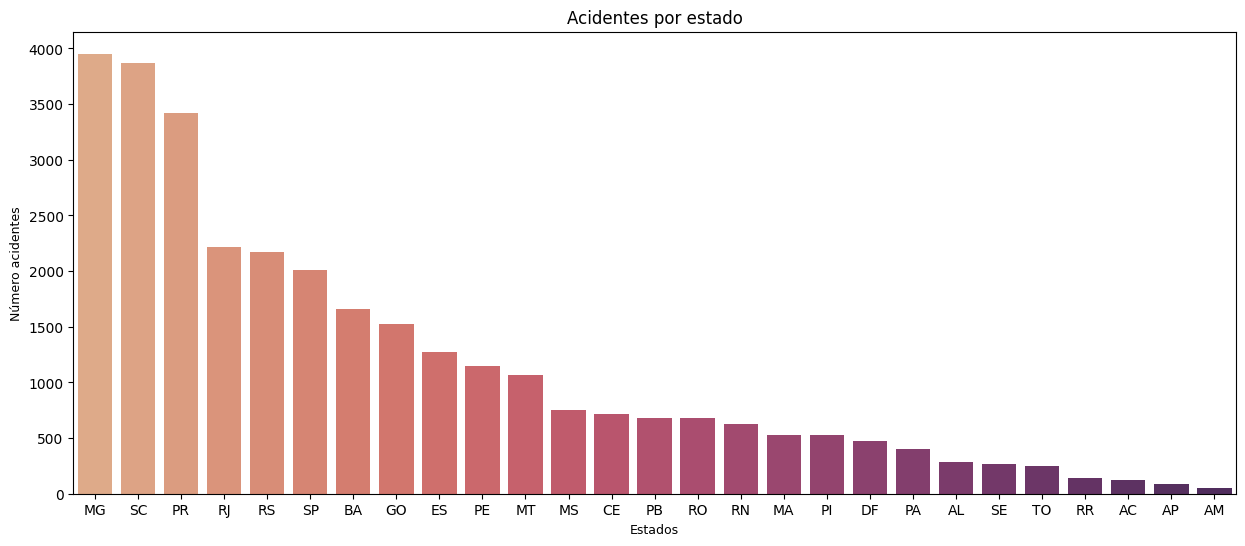

In [11]:
plt.figure(figsize=(15,6))
plt.title("Acidentes por estado")
p = sns.countplot(x=df['uf'], palette="flare", order=df['uf'].value_counts().index)
p.set_xlabel("Estados", fontsize = 9)
p.set_ylabel("Número acidentes", fontsize = 9)
plt.show()


De acordo o gráfico, o estado com maior ocorrência de acidentes é Minas Gerais. Por outro lado, o estado com o menor número é Amazonas.

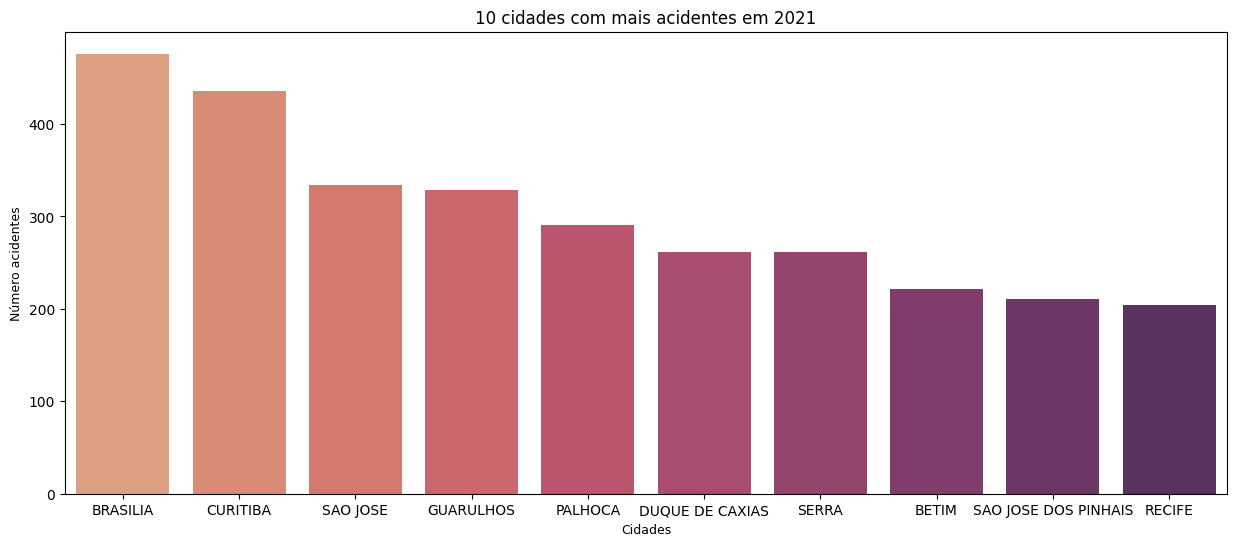

In [13]:
plt.figure(figsize=(15,6))
plt.title("10 cidades com mais acidentes em 2021")
p = sns.barplot(x=df["municipio"].value_counts()[:10].index, y=df["municipio"].value_counts()[:10].values, palette="flare")
p.set_xlabel("Cidades", fontsize = 9)
p.set_ylabel("Número acidentes", fontsize = 9)
plt.show()

Ao analisar o gráfico acima, percebe-se que a cidade que apresentou mais acidentes foi Brasília. As cidades São José e Palhoça fazem parte do estado de Santa Catarina, o qual ocupa a segunda posição do ranking de acidentes por estado. Já Curitiba e São José dos Pinhais são do estado do Paraná, o qual ocupa a terceira posição do ranking de acidentes por estado.




## <font color='darkorange'>4.2 Em que dias da semana e horários ocorrem mais acidentes de trânsito no Brasil?</font>

Para os dias da semana:

In [ ]:
dia_acidente = pd.DataFrame()
dia_acidente['dia_semana'] = df['dia_semana'].value_counts().index
dia_acidente['quantidade'] = df['dia_semana'].value_counts().values
dia_acidente.head()

,dia_semana,quantidade
0,sábado,5165
1,domingo,5088
2,sexta-feira,4880
3,segunda-feira,4164
4,quarta-feira,3916


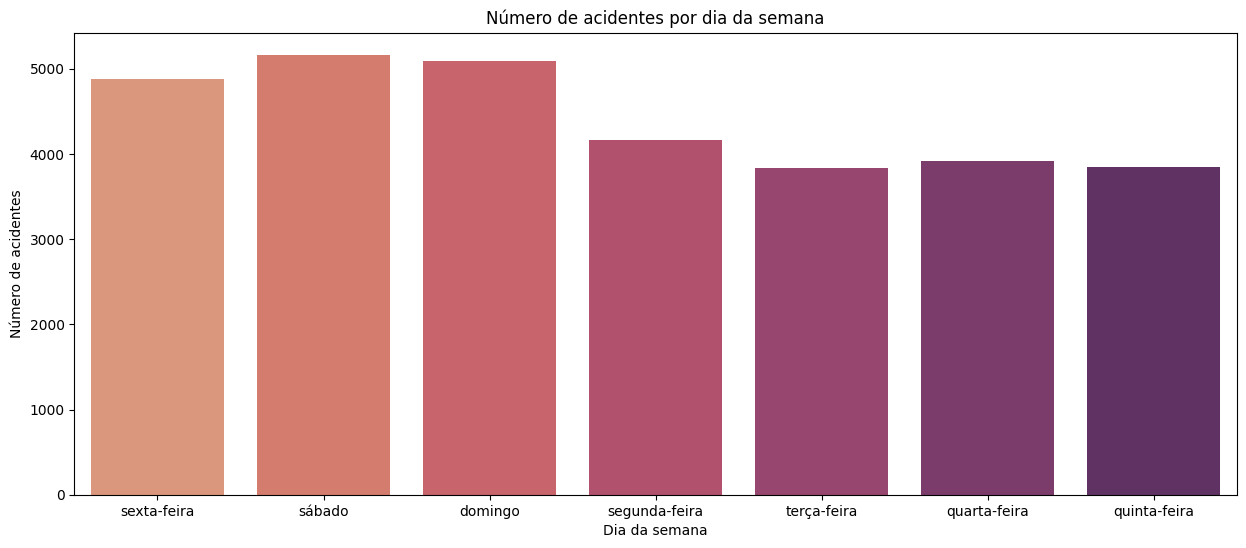

In [14]:
plt.figure(figsize=(15,6))
plt.title("Número de acidentes por dia da semana")
p = sns.countplot(data=df, x='dia_semana', palette='flare')
p.set_xlabel("Dia da semana")
p.set_ylabel("Número de acidentes")
plt.show()

Para os horários:

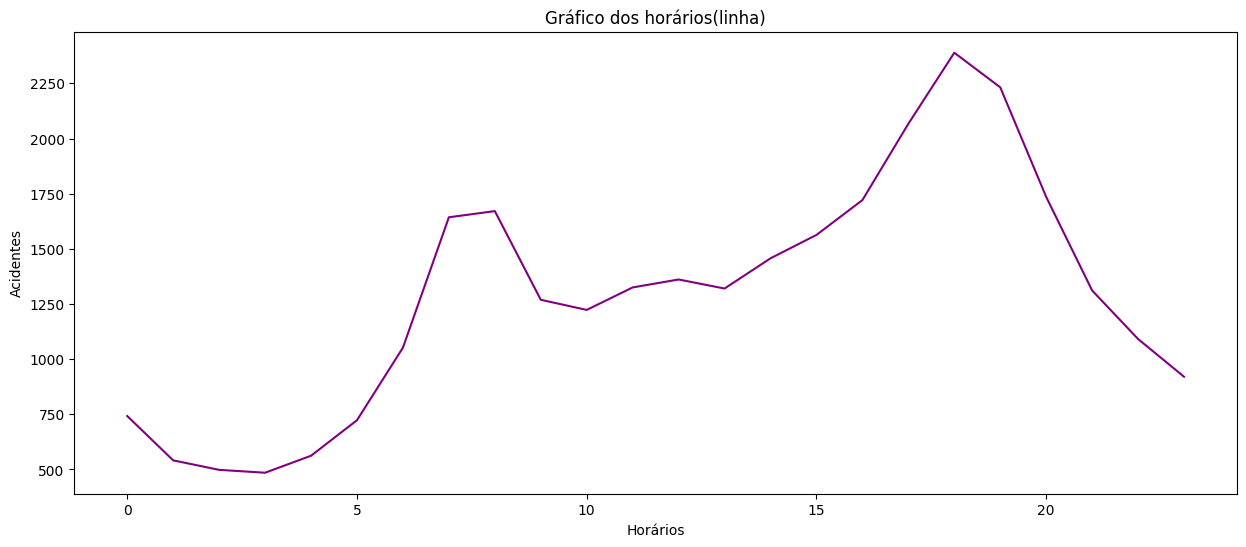

In [18]:
df2 = df
df2['Horarios'] = df2['horario'].apply(horario)
acidentes_por_horario  = acidentes_horario(df2['Horarios'])
df3 = pd.DataFrame({'Horários':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],'Acidentes':acidentes_por_horario})
plt.figure(figsize=(15,6))
plt.title("Gráfico dos horários(linha)")
sns.lineplot(x=df3['Horários'],y=df3['Acidentes'],color="purple")
plt.show()

Agrupamento de horários por meio do K-means para entender quais horários ocorreram acidentes com mais feridos

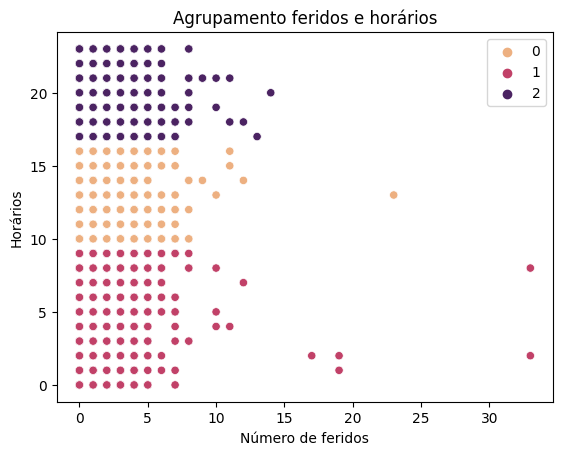

In [21]:
df_group = df[["feridos", "Horarios"]]
kmeans = KMeans(n_clusters=3,n_init='auto')
kmeans.fit(df_group)
KMeans(n_clusters=3)
plt.title("Agrupamento feridos e horários")
sns.scatterplot(data=df_group, x="feridos", y="Horarios", hue=kmeans.labels_,palette="flare")
plt.xlabel("Número de feridos")
plt.ylabel("Horários")
plt.show()
     

A partir dos gráficos acima é possível perceber que, no âmbito dos dias da semana, há um aumento considerável no número de acidentes nos sábados e domingos. Já nos horários, o intervalo entre 17 e 19 horas possui mais casos. Ademais, atráves do agrupamento realizado no último gráfico, nota-se que o intervalo de tempo com maior número de feridos foi no intervalo das 0 as 10 horas da manhã, por mais que a maior parte dos acidentes fosse nos outros horários.

## <font color='darkorange'>4.3 Quais foram os tipos de acidentes mais recorrentes?</font>

Usando o gráfico de barras a seguir para a demonstração dos dados:

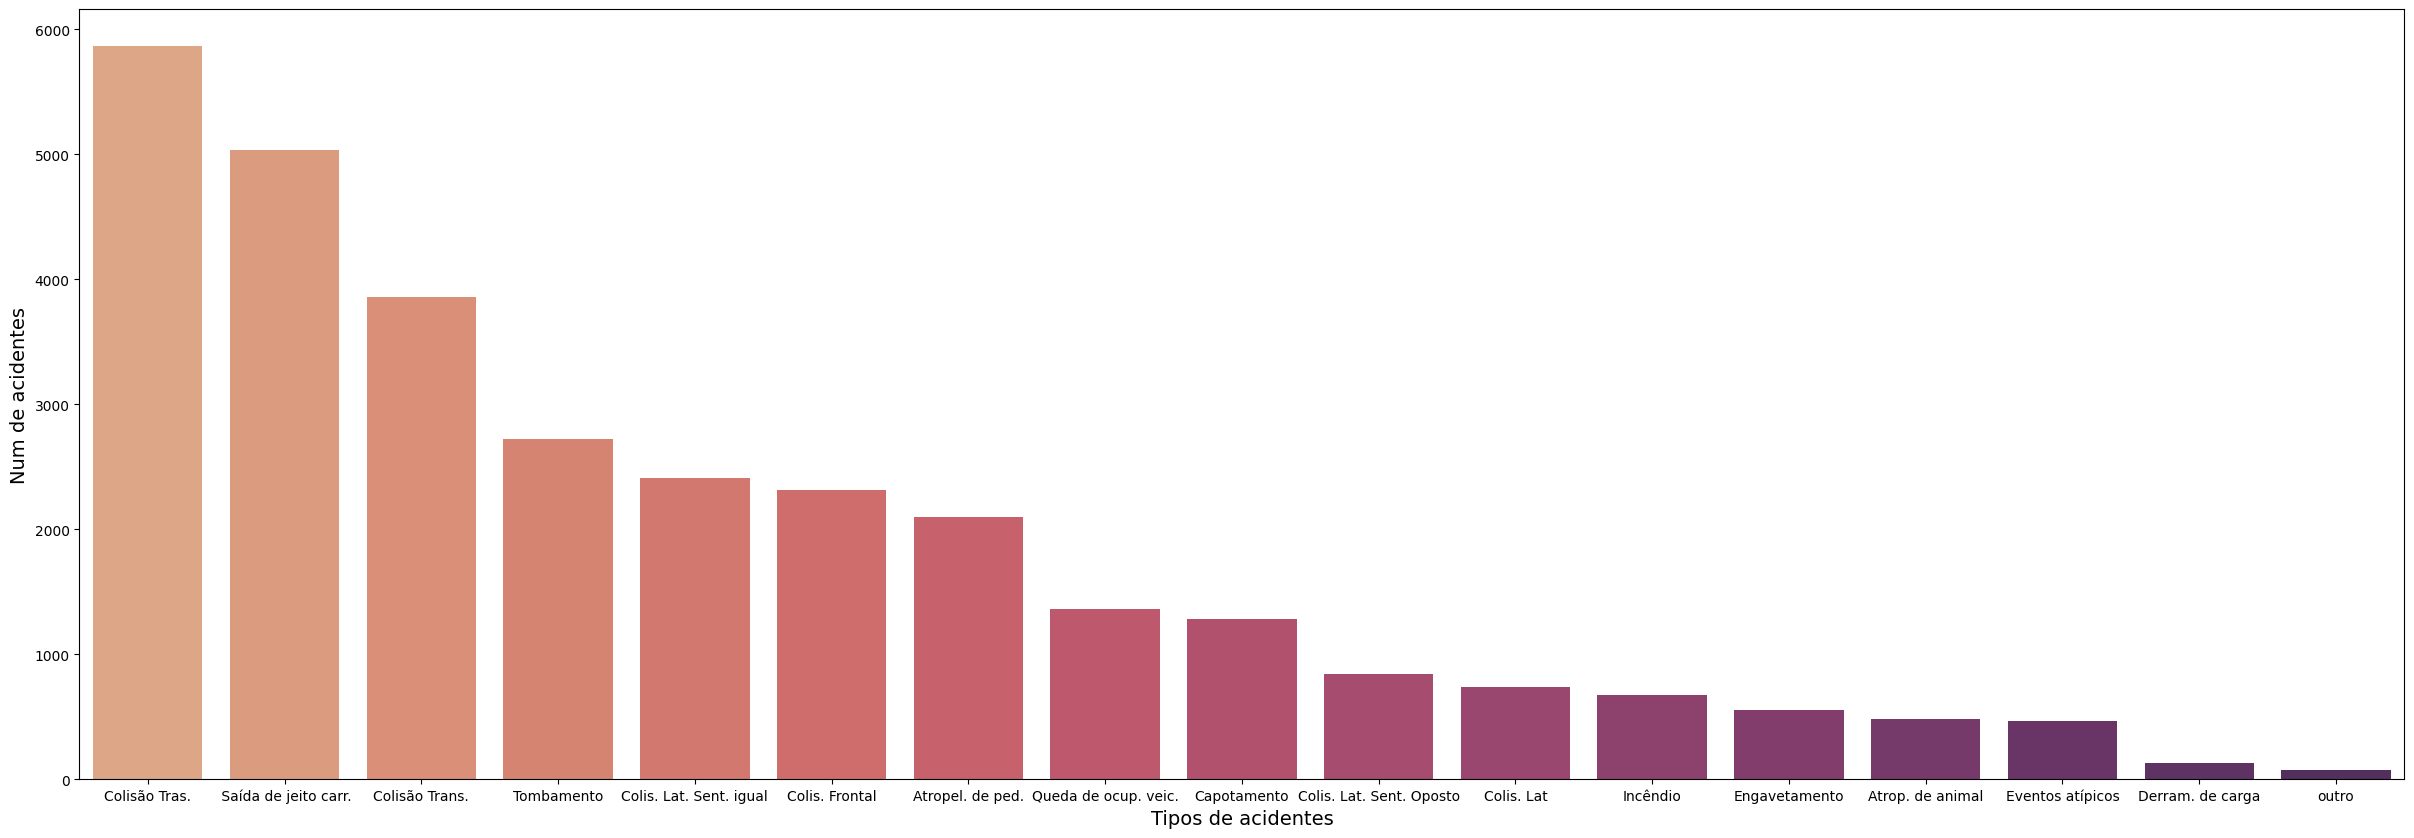

In [17]:

acidentes = pd.DataFrame()
acidentes['tipo_acidente'] = df['tipo_acidente'].value_counts().index
acidentes['acidentes'] = df['tipo_acidente'].value_counts().values
tipos_acidentes = ['Colisão Tras.',' Saída de jeito carr.','Colisão Trans.','Tombamento','Colis. Lat. Sent. igual','Colis. Frontal','Atropel. de ped.','Queda de ocup. veic.','Capotamento','Colis. Lat. Sent. Oposto',
                  'Colis. Lat','Incêndio','Engavetamento','Atrop. de animal','Eventos atípicos', 'Derram. de carga','outro']

plt.figure(figsize = (30,10))
sns.barplot(x= acidentes['tipo_acidente'], y= acidentes['acidentes'], palette = "flare")
plt.xlabel('Tipos de acidentes', fontsize = 14)
plt.ylabel('Num de acidentes', fontsize = 14)
plt.xticks(range(17), tipos_acidentes)
plt.show()


Através do gráfico de barras acima, é possível observar as razões que causaram acidentes naquele ano. No pódio, estão: colisão traseira, com quase 6 mil acidentes, seguido por saída de jeito carroçável, com 5 mil e, por fim,  colisão transversal, com quase 4 mil.

Abreviações:

- 1) Colisão traseira; 
- 2) Saída de jeito carroçável;
- 3) Colisão transversal;
- 5) Colisão Lateral de sentido igual;
- 6) Colisão frontal;
- 7) Atropelamento de pedreste;
- 8) Queda de ocupante de veículo;
- 10) Colisão lateral de sentido oposto;
- 11) Colisão lateral
- 14) Atropelamento de animal;
- 16) Derramamento de carga.


# <font color='darkorange'>5. Conclusão</font>

### Resultados encontrados:
A partir da análise desenvolvida, por meio do dataset "Acidentes de trânsito no Brasil em 2021", conclui-se que:
- As regiões que mais ocorreram acidentes no período observado foram Sul e Sudeste, com destaque para os estados de Minas Gerais, Paraná e Santa Catarina. Já as cidades com o maior número de acidentes foram Brasília e Curitiba.
- Com relação aos dias das semanas, percebe-se um aumento considerável no número de acidentes nos sábados e domingos. Já nos horários, o intervalo entre 17 e 19 horas possui mais casos.
-  Os tipos de acidentes de trânsito no ano em questão com maior número de acidentes não fugiram do comum. A colisão traseira lidera o ranking com quase 6 mil ocorrências. Tal fato pode ser explicado pela ausência de espaço entre os veículos, bem como distrações do motorista.

### Limitações:
 O dataset escolhido tem como limitação o curto período dos dados obtidos em 2021, sendo de apenas 6 meses. Além disso, não foi possível comparar as informações desse ano com o anterior devido ao demasiado tamanho do arquivo, não sendo viável baixá-lo. Por fim, estudar todas as causas de acidentes obtidas nesse dataset foi inviável, já que o número de dados é extenso e diverso.

### Possíveis melhorias:
No que diz respeito aos procedimentos de análises do dataset, foi identificada a necessidade de se trabalhar com a manipulação de dados no formato de strings (datas, causas de acidentes, horário...), a qual não foi muito explorada. Ainda sob esse viés, utilizar outras variáveis e datasets de diferentes períodos.